# 1. 해시

## 1-1. 완주하지 못한 선수
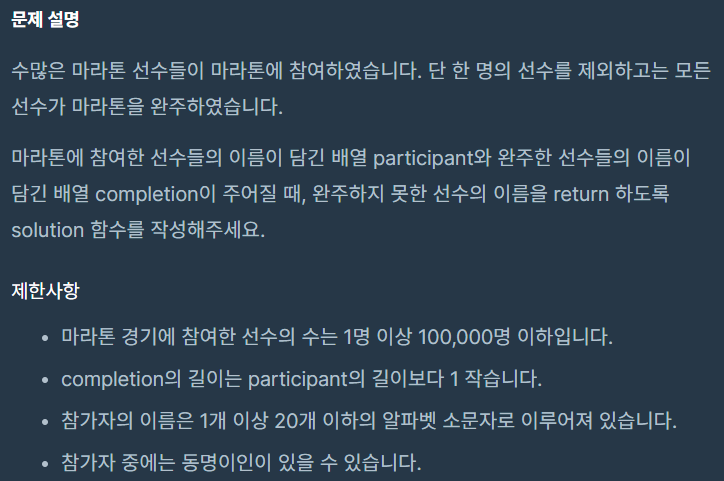

### 내 풀이

In [4]:
def solution(participant, completion):
    # 참가자 딕셔너리 {'참가자 이름':'참가한 인원 수'}
    part = {}
    for p in participant:
        part[p] = 0
    for p in participant:
        part[p] += 1
        
    # 참가자 딕셔너리에서 완주자 이름을 확인하며 인원 수 - 1
    for c in completion:
        part[c] -= 1
    
    # 참가자 딕셔너리 값이 0이 아닌 경우 완주하지 못한 것
    for p in participant:
        if part[p] != 0:
            answer = p
            return answer

### 상위 풀이 1
- counter 객체 사용

In [ ]:
import collections

def solution(participant, completion):
    answer = collections.Counter(participant) - collections.Counter(completion)
    return list(answer.keys())[0]

In [5]:
import collections

temp = ['a', 'b', 'c', 'a', 'c']
collections.Counter(temp)

Counter({'a': 2, 'b': 1, 'c': 2})

### 상위 풀이 2
- 해시함수 사용
- hash 값은 key마다 달라지게 된다

In [8]:
def solution(participant, completion):
    answer = ''
    temp = 0
    dic = {}
    for part in participant:
        dic[hash(part)] = part
        temp += hash(part)
    for com in completion:
        temp -= hash(com)
    answer = dic[temp]
    
    return answer

In [11]:
dic = {}
participant = ['lee', 'da', 'hye']
for part in participant:
    dic[hash(part)] = part
print(dic)

{8433811340968751058: 'lee', 1392638181247692154: 'da', -7932980492041655044: 'hye'}


### 상위 풀이 3

In [ ]:
def solution(participant, completion):
    participant.sort()
    completion.sort()
    for i in range(len(completion)):
        if participant[i] != completion[i]:
            return participant[i]
    # 동명이인이 맨 마지막에 있는 경우 
    return participant[len(participant)-1]

## 1-2. 전화번호 목록
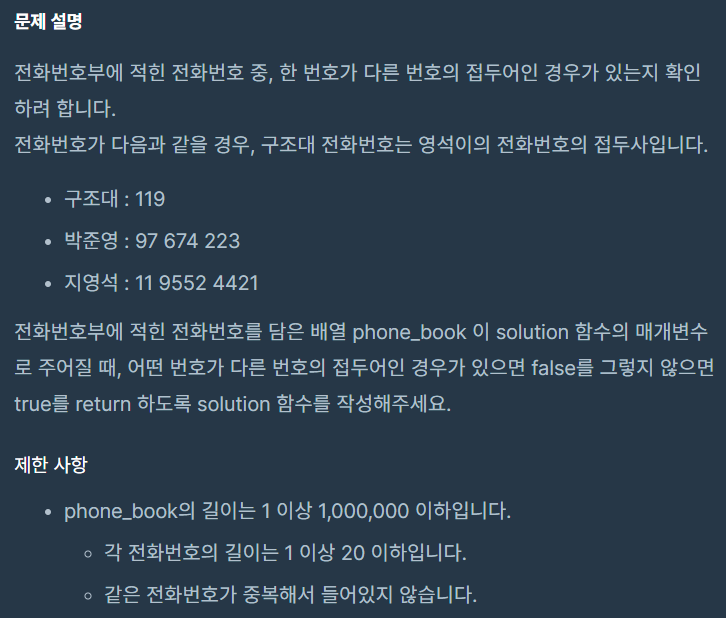

### 내 풀이
- sort 함수에서 시간 복잡도가 높은듯

In [21]:
def solution(phone_book):
    answer = True
    phone_book.sort()
    for i in range(0, len(phone_book) - 1):
        temp = len(phone_book[i])
        if phone_book[i] == phone_book[i + 1][:temp]:
            answer = False
            break
    return answer

### 상위 코드 1
- 딕셔너리 이용

In [22]:
def solution(phone_book):
    answer = True
    hash_map = {}
    for phone_number in phone_book:
        hash_map[phone_number] = 1
        
    for phone_number in phone_book:
        temp = ""
        for number in phone_number:
            temp += number
            if temp in hash_map and temp != phone_number:
                answer = False
                return answer
    return answer

## 1-3. 위장
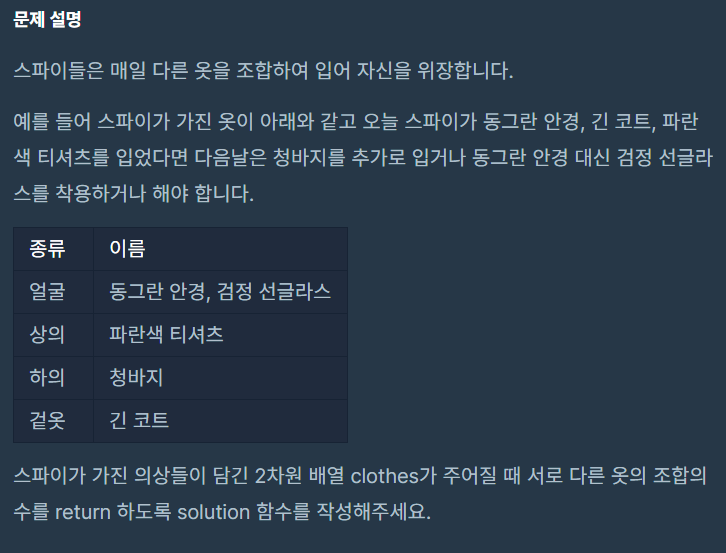

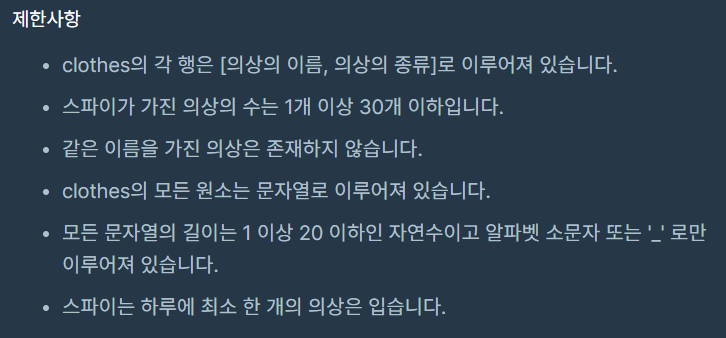